# Additional Charts and Tables (Jean-Sebastien Gaultier)

This notebook is used as a step-by-step for the creation of intial plots and graphs that can be used to grasp a first understanding of the data.

More specifically we will work with understanding the returns of the funds.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 
import config
from pathlib import Path
OUTPUT_DIR = Path(config.OUTPUT_DIR)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
from pathlib import Path

import numpy as np
import pandas as pd
import wrds

from load_CRSP_fund import load_CRSP_combined_file
from load_s12 import load_s12_file
from load_mflink import load_mflink1, load_mflink2


import config
WRDS_USERNAME = config.WRDS_USERNAME

df_crsp = load_CRSP_combined_file()
df_s12 = load_s12_file()
df_mflink1 = load_mflink1()
df_mflink2 = load_mflink2()

In [13]:
df_mflink1.groupby("crsp_fundno").size().value_counts()
df_mflink1

,crsp_fundno,wficn
0,2.0,301534.0
1,4.0,401172.0
2,7.0,100154.0
3,12.0,100005.0
4,15.0,401008.0
...,...,...
49661,101560.0,607498.0
49662,101561.0,604419.0
49663,101564.0,501459.0
49664,101565.0,501537.0


In [14]:
print(f"Before merging, df_crsp has {df_crsp.shape[0]} rows")
df_crsp = df_crsp.merge(df_mflink1, how="inner", on="crsp_fundno").reset_index(
    drop=True
)
print(f"After merging, df_crsp has {df_crsp.shape[0]} rows")

Before merging, df_crsp has 3555788 rows
After merging, df_crsp has 3270889 rows


In [15]:
df_crsp = df_crsp.sort_values(["caldt", "wficn"])
df_crsp['year'] = df_crsp['caldt'].dt.year.astype('int')
df_crsp['month'] = df_crsp['caldt'].dt.month.astype('int')
df_crsp = df_crsp[df_crsp['wficn'].notnull()]
df_crsp['wficn'] = df_crsp['wficn'].astype('int')
df_crsp['mret'] = df_crsp['mret'].fillna(0)
df_crsp.head()

,caldt,crsp_fundno,mtna,mret,mnav,lipper_asset_cd,lipper_class_name,crsp_obj_cd,wficn,year,month
2036450,1980-01-31,32668.0,NaN,0.000000,NaN,None,None,EDYG,100007,1980,1
9807,1980-01-31,967.0,NaN,0.121324,12.20,None,None,EDYG,100010,1980,1
347305,1980-01-31,7353.0,NaN,0.056240,24.38,None,None,EDYG,100019,1980,1
15119,1980-01-31,1445.0,NaN,0.016978,5.99,None,None,EDYG,100046,1980,1
3625,1980-01-31,297.0,NaN,0.079268,17.70,None,None,EDYG,100056,1980,1


In [16]:
df_crsp["crsp_obj_cd"].value_counts()

crsp_obj_cd
EDYG    1058146
EDYB     738326
EDCS     463431
EDCM     322984
EDYI     132210
EDYH     104935
EDSR      79392
EDST      72227
EDCL      52828
EDSH      42029
EDSN      34108
EDSU      32100
EDSF      31382
EDCI      20864
EDSG      17777
EDSC      14028
EDSO       9982
EDSA       9905
EDSI       9509
EDYS       9239
EDSS       7805
EDSM       6236
EDS        1174
ED          272
Name: count, dtype: int64

## Funds grouped by their years

The idea with this is that each fund will have all the information about that specific year. 
Additionally, we do not know exactly what the monthly return means. (for example if monthly return in january was 10% and in February it was 10% does that mean the monthly return over the year was 20%, or just 10%) Therefore we take both of those into account.

In [19]:
df_crsp['year'] = pd.to_numeric(df_crsp['year'], errors='coerce')

In [30]:
# Here we get the monthly return but as a sum for each fund
grouped_data = df_crsp.groupby(['crsp_fundno', 'year'])
result_df = grouped_data['mret'].sum().reset_index()
result_df

,crsp_fundno,year,mret
0,2.0,1997,0.012139
1,2.0,1998,0.100068
2,2.0,1999,0.122619
3,2.0,2000,0.043612
4,7.0,1994,0.019823
...,...,...,...
295657,101502.0,2023,0.093281
295658,101560.0,2023,0.085058
295659,101564.0,2023,-0.054686
295660,101565.0,2023,0.082729


In [45]:
grouped_data = df_crsp.groupby(['crsp_fundno', 'year'])
result_df = grouped_data['mret'].mean().reset_index()
result_df

,crsp_fundno,year,mret
0,2.0,1997,0.012139
1,2.0,1998,0.008339
2,2.0,1999,0.010218
3,2.0,2000,0.005452
4,7.0,1994,0.019823
...,...,...,...
295657,101502.0,2023,0.013326
295658,101560.0,2023,0.014176
295659,101564.0,2023,-0.013671
295660,101565.0,2023,0.013788


In [46]:
grouped_yearly_data = result_df.groupby('year')
yearly_stats_df = grouped_yearly_data.agg(
    num_funds=('crsp_fundno', 'size'),
    mret_mean=('mret', 'mean'),
    mret_median=('mret', 'median')
).reset_index()
yearly_stats_df

,year,num_funds,mret_mean,mret_median
0,1980,240,0.026157,0.026458
1,1981,247,-0.001546,-0.000721
2,1982,249,0.019091,0.020068
3,1983,280,0.014745,0.015519
4,1984,309,-0.002089,-0.001849
5,1985,361,0.021559,0.021894
6,1986,417,0.008329,0.011466
7,1987,462,0.014599,0.007158
8,1988,531,0.012244,0.012192
9,1989,588,0.019567,0.018768


When we run this, we notice that we do not have the same number of funds per year than the table 1 has in the report. Therefore that might explain why the returns are different as well. We will try to get rid of some funds.

# Yearly average return plot

This plot can be used to see which years the funds were good to invest in and the years they were not as much

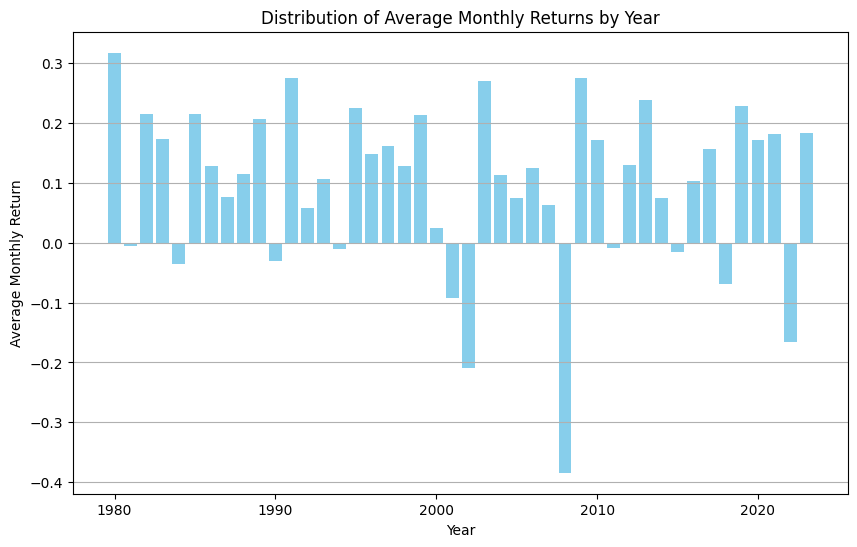

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_stats_df['year'], yearly_stats_df['mret_mean'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Monthly Return')
plt.title('Distribution of Average Monthly Returns by Year')
plt.grid(axis='y')
plt.show()
plt.savefig('histogram.png')

This plot is wonderful because we clearly see the crisis in 2008 had a big impact and all the funds were down on average 40% which is huge.

## Plotting Returns by year and fund group type

The important thing to understand is that funds are divided into different groups

Some of those groups are (we are assuming this is what the codes mean):

- EDYG:  "Equity Domestic Growth" funds, which typically invest in stocks with a focus on dividends and growth potential.

- EDYB:  "Equity Domestic Balanced" funds, which may invest in both stocks and bonds, with an emphasis on dividends.

- EDCS: "Equity Consumer Staples" funds, which invest primarily in companies that produce or distribute consumer staples such as food, beverages, and household goods.

In [35]:

grouped_data = df_crsp.groupby(['year', 'crsp_obj_cd'])
yearly_objcode_stats_df = grouped_data['mret'].mean().reset_index()
print(yearly_objcode_stats_df)

     year crsp_obj_cd      mret
0    1980        EDYG  0.027494
1    1981        EDYG -0.000544
2    1982        EDYG  0.019014
3    1983        EDYG  0.016477
4    1984        EDYG -0.003313
..    ...         ...       ...
611  2023        EDYB  0.014001
612  2023        EDYG  0.021128
613  2023        EDYH  0.016642
614  2023        EDYI  0.009543
615  2023        EDYS -0.024637

[616 rows x 3 columns]


In [36]:
grouped_data = yearly_objcode_stats_df.groupby('crsp_obj_cd')
objcode_mean_mret_df = grouped_data['mret'].mean().reset_index()
objcode_mean_mret_df

,crsp_obj_cd,mret
0,ED,0.006589
1,EDCI,0.009143
2,EDCL,0.007055
3,EDCM,0.009248
4,EDCS,0.010173
5,EDS,0.017730
6,EDSA,0.005208
7,EDSC,-0.001304
8,EDSF,0.011741
9,EDSG,0.009882


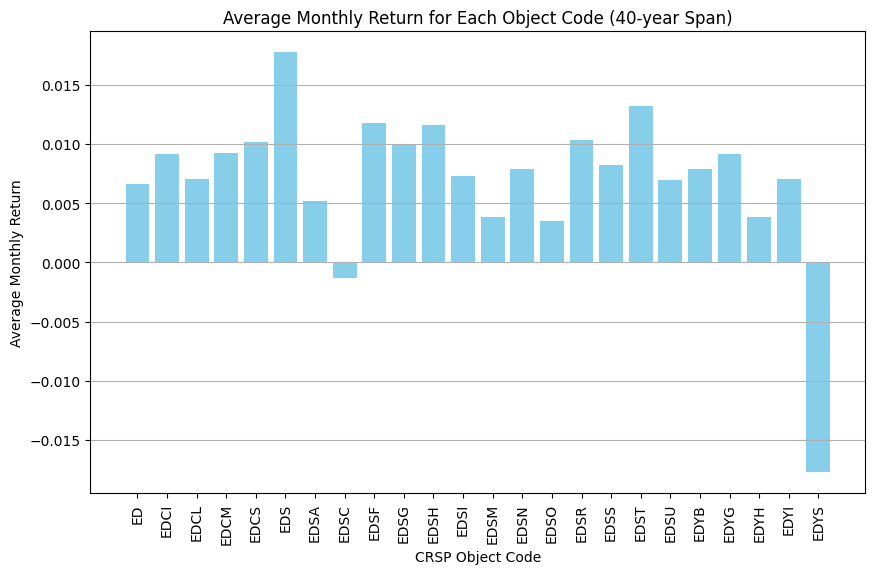

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(objcode_mean_mret_df['crsp_obj_cd'], objcode_mean_mret_df['mret'], color='skyblue')
plt.xlabel('CRSP Object Code')
plt.ylabel('Average Monthly Return')
plt.title('Average Monthly Return for Each Object Code (40-year Span)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
plt.savefig('histogram_mret_per_code.png')

This graph is pretty good as well because it shows how each type of fund acted over the duration of the data. We do notice that most people will have made money aside from the people that had their money in the EDYS funds

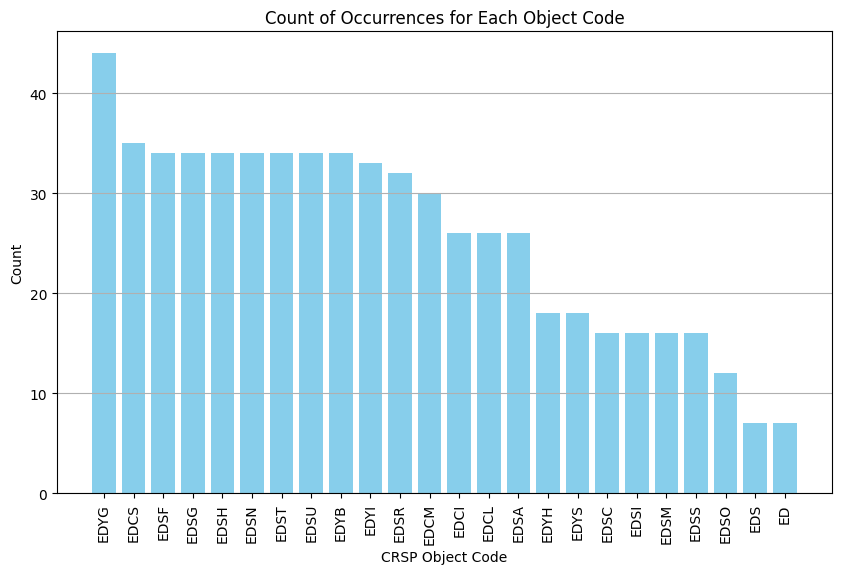

<Figure size 640x480 with 0 Axes>

In [42]:
object_code_counts = yearly_objcode_stats_df['crsp_obj_cd'].value_counts().reset_index()
object_code_counts.columns = ['crsp_obj_cd', 'count']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(object_code_counts['crsp_obj_cd'], object_code_counts['count'], color='skyblue')
plt.xlabel('CRSP Object Code')
plt.ylabel('Count')
plt.title('Count of Occurrences for Each Object Code')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
plt.savefig('histogram_code_count.png')

For this graph we notice that not all of the fund types existed throughout all of the years.

## Count of the number of funds per object code

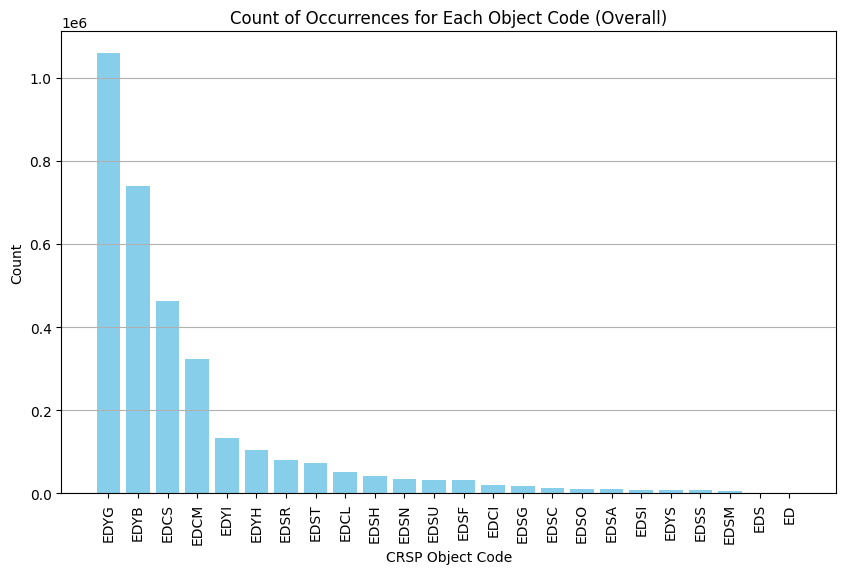

<Figure size 640x480 with 0 Axes>

In [43]:
object_code_counts = df_crsp['crsp_obj_cd'].value_counts().reset_index()
object_code_counts.columns = ['crsp_obj_cd', 'count']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(object_code_counts['crsp_obj_cd'], object_code_counts['count'], color='skyblue')
plt.xlabel('CRSP Object Code')
plt.ylabel('Count')
plt.title('Count of Occurrences for Each Object Code (Overall)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
plt.savefig('histogram_code_count_overall.png')

This graph concludes our analysis of the object codes. We notice that EDYG funds have existed for the longest and are the most popular. Their return seems to follow the market at an average of almost 10% per year.

For example investing $100,000 in 1980 into an EDYG would now run you over 
# $3.14 million

# Final Charts

In the data/manual, there are various histograms that have been included that describe the data and the returns.
- histogram.png: Distribution of Average Monthly Returns by Year
- histogram_mret_per_code.png: Average Monthly Return for Each Object Code (40-year Span)
- histogram_code_count.png: Count of Occurrences for Each Object Code
- histogram_code_count_overall.png: Count of Occurrences for Each Object Code (Overall)

Additionally there are some interesting dataframes:
- objcode_mean_mret_df: which gives the average monthly return per year per object code
- yearly_stats_df: which gives the average monthly return per year


## Unit test

In [47]:
import unittest

data = {
    'year': [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987],
    'mean': [0.09, 0.08, 0.21, -0.01, 0.01, 0.17, 0.04, -0.22],
    'median': [0.10, 0.08, 0.23, -0.01, 0.01, 0.16, 0.04, -0.21]
}
expected_df = pd.DataFrame(data)
class TestYearlyStats(unittest.TestCase):
    
    def test_head_matches(self):
        self.assertTrue(yearly_stats_df.head().equals(expected_df.head()))

# Run the unit tests
if __name__ == '__main__':
    unittest.main()

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/Users/jean-sebastiengaultier/Library/Jupyter/runtime/kernel-v2-76461XYodB6p2VCu7.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'